<a href="https://colab.research.google.com/github/lnpetrova/comp_ling/blob/master/ML_hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from IPython.display import Image

In [0]:
import tarfile
import os
import pandas as pd
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, roc_curve

In [4]:
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

--2020-02-24 21:24:02--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  22.9MB/s    in 5.3s    

2020-02-24 21:24:08 (15.0 MB/s) - ‘aclImdb_v1.tar.gz’ saved [84125825/84125825]



In [0]:
tarfile.open('/content/aclImdb_v1.tar.gz', 'r').extractall()

In [0]:
path_test_neg = '/content/aclImdb/test/neg'
path_test_pos = '/content/aclImdb/test/pos'
path_train_neg = '/content/aclImdb/train/neg'
path_train_pos = '/content/aclImdb/train/pos'

In [0]:
find_test_neg = os.walk(path_test_neg)
tests_neg = list(find_test_neg)[0][-1]
#print(tests_neg)

find_test_pos = os.walk(path_test_pos)
tests_pos = list(find_test_pos)[0][-1]

find_train_neg = os.walk(path_train_neg)
trains_neg = list(find_train_neg)[0][-1]

find_train_pos = os.walk(path_train_pos)
trains_pos = list(find_train_pos)[0][-1]

In [0]:
# pathes = []
# pathes.append(path_test_neg)
# pathes.append(path_test_pos)
# pathes.append(path_train_pos)
# pathes.append(path_train_neg)

In [0]:
# def get_files(path):
#   find_files = os.walk(path)
#   list_of_files = list(find_files)[0][-1]
#   return list_of_files

In [0]:
# for path in pathes:
#   get_files(path)

In [0]:
def collect_texts(path, files):
    texts = [open('{}/{}'.format(path, file)).read().lower() for file in files]
    return texts

In [12]:
test_pos_df = pd.DataFrame(collect_texts(path_test_pos, tests_pos),  columns = ['text'])
test_pos_df['polarity'] = 1
test_pos_df.head()

,text,polarity
0,even an old cynical doctor who fan like myself...,1
1,i just had the opportunity to see 'nuovomondo'...,1
2,"i watched love life on holiday, when it was fi...",1
3,if you love drive-in cheeze from the early '70...,1
4,what a trip down memory lane.<br /><br />do no...,1


In [13]:
test_neg_df = pd.DataFrame(collect_texts(path_test_neg, tests_neg),  columns = ['text'])
test_neg_df['polarity'] = 0
test_neg_df.head()

,text,polarity
0,this movie was an absolute waste of time. it's...,0
1,some spoilers**** a soap has some wonderful mo...,0
2,i'm not sure what the director and editor were...,0
3,"yes, thats that i felt after i completed watch...",0
4,"first off, i am critical of this movie because...",0


In [14]:
test = pd.concat((test_pos_df, test_neg_df))
test

,text,polarity
0,even an old cynical doctor who fan like myself...,1
1,i just had the opportunity to see 'nuovomondo'...,1
2,"i watched love life on holiday, when it was fi...",1
3,if you love drive-in cheeze from the early '70...,1
4,what a trip down memory lane.<br /><br />do no...,1
...,...,...
12495,i can't believe i even tried to watch this fil...,0
12496,what is wrong with curacao ( also known as dea...,0
12497,"inane, awful farce basically about a young man...",0
12498,when i first saw this show i thought to my sel...,0


In [15]:
train_pos_df = pd.DataFrame(collect_texts(path_train_pos, trains_pos),  columns = ['text'])
train_pos_df['polarity'] = 1
train_pos_df.head()

,text,polarity
0,i first saw ice age in the subiaco cinemas whe...,1
1,what can i say ? an action and allegorical tal...,1
2,reviewed at the world premiere screening sept....,1
3,"i may be biased, i am the author of the novel ...",1
4,"what a strangely wonderful, if sometimes sligh...",1


In [16]:
train_neg_df = pd.DataFrame(collect_texts(path_train_neg, trains_neg),  columns = ['text'])
train_neg_df['polarity'] = 0
train_neg_df.head()

,text,polarity
0,this movie is really goofy! i saw it as an 11 ...,0
1,basically this is about a couple who want to a...,0
2,"hmm i agree with the reviewer who said that ""...",0
3,'the omen 4: the awakening' is a made-for-tele...,0
4,bugs bunny accidentally ends up at the south p...,0


In [17]:
train = pd.concat((train_pos_df, train_neg_df))
train

,text,polarity
0,i first saw ice age in the subiaco cinemas whe...,1
1,what can i say ? an action and allegorical tal...,1
2,reviewed at the world premiere screening sept....,1
3,"i may be biased, i am the author of the novel ...",1
4,"what a strangely wonderful, if sometimes sligh...",1
...,...,...
12495,i was shocked by the ridiculously unbelievable...,0
12496,this movie is just plain bad. it isn't even wo...,0
12497,aka: mondays in the sun<br /><br />i have no i...,0
12498,"after eagerly waiting to the end, i have to sa...",0


In [18]:
train = shuffle(train, random_state=42)
train = train[:1000]
train.head()

,text,polarity
6868,i'm always surprised about how many times you'...,1
11516,this is one of the worst movies i have seen to...,0
9668,i just came back from hong kong on my summer v...,1
1140,the best thing about camp films in general is ...,0
1518,i realise that the us army was demoralised by ...,0


In [24]:
x_train = vectorizer.fit_transform(train.text)
print(x_train)
y_train = train.polarity
print(y_train)

  (0, 7)	0.03472561660519713
  (0, 1060)	0.059682910412275955
  (0, 8095)	0.03713525261106065
  (0, 2584)	0.046576283066411046
  (0, 6912)	0.08280579206339418
  (0, 1457)	0.06433599873109724
  (0, 13917)	0.05211745515199976
  (0, 364)	0.03862177604573049
  (0, 9246)	0.034050367273367375
  (0, 9217)	0.0416815873430294
  (0, 10405)	0.06842917464702541
  (0, 958)	0.04932166571327133
  (0, 13586)	0.04436253451554382
  (0, 8094)	0.05528771896537951
  (0, 17151)	0.04786707228684303
  (0, 4031)	0.09315256613282209
  (0, 8677)	0.053820712419480846
  (0, 15272)	0.058246547216578036
  (0, 1608)	0.07019819672389235
  (0, 14071)	0.07815270374457291
  (0, 7040)	0.049015622834365107
  (0, 1652)	0.03630780041383884
  (0, 8920)	0.04136715869259077
  (0, 8479)	0.02177543081503454
  (0, 15817)	0.058246547216578036
  :	:
  (999, 1495)	0.040806643322571015
  (999, 8279)	0.10674248727450274
  (999, 6653)	0.1690648497500728
  (999, 11322)	0.03777554093390307
  (999, 6250)	0.042224377985992496
  (999, 9262)	

In [25]:
test = shuffle(test, random_state=42)
test = test[:1000]
test.head()

,text,polarity
4977,"well, i like to watch bad horror b-movies, cau...",0
1979,this film is a third rate attempt at a compell...,0
4547,william h. macy is terrific in this alfred hit...,1
6246,edge vs. michaels-boring in general (loved the...,0
8993,"a gem from japan, where so many of the world's...",1


In [26]:
x_test = vectorizer.transform(test.text)
print(x_test)
y_test = test.polarity
print(y_test)

  (0, 17168)	0.1804390439179778
  (0, 17151)	0.11110630777087148
  (0, 17126)	0.15527697126023418
  (0, 16838)	0.13367600683366715
  (0, 16836)	0.06810873782318937
  (0, 16805)	0.15883388257545247
  (0, 16184)	0.10205315786451177
  (0, 15572)	0.18140358163824816
  (0, 15526)	0.0688771738034484
  (0, 14896)	0.16294003534259943
  (0, 14457)	0.16294003534259943
  (0, 13896)	0.13086949068076265
  (0, 13703)	0.11448262675586716
  (0, 13613)	0.13933687584656348
  (0, 13531)	0.11753020579090735
  (0, 11301)	0.06412912812860423
  (0, 10201)	0.33437655347927703
  (0, 10200)	0.1216158074321822
  (0, 9428)	0.07884617322200371
  (0, 9246)	0.0790357631090347
  (0, 9049)	0.09389239724025848
  (0, 8095)	0.17239244468635045
  (0, 7908)	0.31055394252046836
  (0, 7542)	0.11308034158809271
  (0, 7492)	0.1913230557760151
  :	:
  (999, 2852)	0.10324781089112807
  (999, 2738)	0.06074428131139913
  (999, 2538)	0.09332959845528035
  (999, 2231)	0.06498353580798964
  (999, 2096)	0.0776096036702755
  (999, 1980

## **Метод ближайшего соседа**

In [0]:
clf_KN = KNeighborsClassifier().fit(x_train, y_train)

In [46]:
predicted_KN = clf_KN.predict(x_test)
predicted_proba_KN = clf_KN.predict_proba(x_test)
print(predicted_proba_KN)

[[0.8 0.2]
 [0.6 0.4]
 [0.2 0.8]
 ...
 [0.6 0.4]
 [0.6 0.4]
 [0.  1. ]]


In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score

In [48]:
acc = accuracy_score(predicted_KN, y_test)
micro_f1 = f1_score(predicted_KN, y_test, average = 'micro')
micro_p = precision_score(predicted_KN,y_test, average = 'micro')
micro_r = recall_score(predicted_KN, y_test, average = 'micro')
macro_f1 = f1_score(predicted_KN, y_test, average = 'macro')
macro_p = precision_score(predicted_KN, y_test, average = 'macro')
macro_r = recall_score(predicted_KN, y_test, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

acc=0.6300
micro F1=0.6300, micro P=0.6300, micro R=0.6300
macro F1=0.6268, macro P=0.6323, macro R=0.6381



NameError: ignored

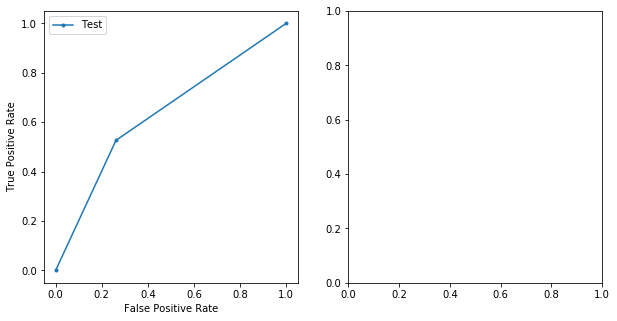

In [49]:
eval_sklearn(y_test, predicted_KN)

In [0]:

y_true = np.array([0, 1, 1, 1, 0])
y_predicted = np.array([0.1, 0.7, 0.4, 0.2, 0.27])
fpr, tpr, _ = roc_curve(y_true, y_predicted)
pyplot.plot(fpr, tpr, marker='.', label='Test')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [0]:
from sklearn.datasets import fetch_20newsgroups
data.target_names

In [0]:
def eval_sklearn(true, predicted, categories = ['neg', 'pos'], visual=True):
    acc = accuracy_score(true, predicted)
    micro_p = precision_score(true, predicted, average = 'micro')
    macro_p = precision_score(true, predicted, average = 'macro')
    weighted_p = precision_score(true, predicted, average = 'weighted')
    micro_r = recall_score(true, predicted, average = 'micro')
    macro_r = recall_score(true, predicted, average = 'macro')
    weighted_r = recall_score(true, predicted, average = 'weighted')
    micro_f1 = f1_score(true, predicted, average = 'micro')
    macro_f1 = f1_score(true, predicted, average = 'macro')
    weighted_f1 = f1_score(true, predicted, average = 'weighted')
    fpr, tpr, _ = roc_curve(true, predicted)
    roc_auc = roc_auc_score(true, predicted)
    if visual:
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
        ax1.plot(fpr, tpr, marker='.', label='Test')
        ax1.set_xlabel('False Positive Rate')
        ax1.set_ylabel('True Positive Rate')
        ax1.legend()
        sns.heatmap(data=confusion_matrix(y_test, logreg_preds), annot=True, fmt="d", cbar=False, xticklabels=categories, yticklabels=categories)
        ax2.set_title("Confusion matrix")
        plt.show()

    print(''' 
ROC AUC:\t{:.3f}
Accuracy:\t{:.3f}
\t\tMicro\tMacro\tWeighted
Precision:\t{:.3f}\t{:.3f}\t{:.3f}
Recall:\t\t{:.3f}\t{:.3f}\t{:.3f}
F-measure:\t{:.3f}\t{:.3f}\t{:.3f}
'''.format(roc_auc, acc, micro_p, macro_p, weighted_p, micro_r, macro_r, weighted_r, micro_f1, macro_f1, weighted_f1))

## **Логистическая регрессия**

In [27]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
logreg_preds = logreg.predict(x_test)
print(y_test.values)
print(logreg_preds)

[0 0 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0
 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 1 1 0 1
 1 1 0 0 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1
 1 0 0 1 1 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1
 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1
 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 1 1 1
 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 1 1 0 1 0 1 0
 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1
 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 0 0 0 1
 1 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0
 1 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 0 0 1
 0 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0
 1 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 1 

In [31]:
eval_sklearn(y_test, logreg_preds)

NameError: ignored